In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np

Cross-Validation
----------------------------------------

In [2]:
from sklearn.datasets import load_iris

In [3]:
iris = load_iris()
X = iris.data
y = iris.target

In [4]:
from sklearn.cross_validation import cross_val_score
from sklearn.svm import LinearSVC

In [5]:
cross_val_score(LinearSVC(), X, y, cv=5)

array([ 1.        ,  1.        ,  0.93333333,  0.9       ,  1.        ])

In [6]:
cross_val_score(LinearSVC(), X, y, cv=5, scoring="f1_macro")

array([ 1.        ,  1.        ,  0.93333333,  0.89974937,  1.        ])

Let's go to a binary task for a moment

In [13]:
y % 2

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [19]:
cross_val_score(LinearSVC(), X, y % 2)

array([ 0.74509804,  0.76      ,  0.55102041])

In [20]:
cross_val_score(LinearSVC(), X, y % 2, scoring="average_precision")

array([ 0.66164013,  0.64831654,  0.31676038])

In [21]:
cross_val_score(LinearSVC(), X, y % 2, scoring="roc_auc")

array([ 0.75951557,  0.83778966,  0.53598485])

In [22]:
from sklearn.metrics.scorer import SCORERS
print(SCORERS.keys())

dict_keys(['precision_macro', 'precision', 'recall_micro', 'precision_micro', 'r2', 'f1_macro', 'recall_weighted', 'f1_samples', 'precision_weighted', 'median_absolute_error', 'f1_micro', 'accuracy', 'recall', 'adjusted_rand_score', 'f1_weighted', 'recall_macro', 'f1', 'precision_samples', 'log_loss', 'average_precision', 'mean_absolute_error', 'recall_samples', 'roc_auc', 'mean_squared_error'])


There are other ways to do cross-valiation

In [26]:
from sklearn.cross_validation import ShuffleSplit

shuffle_split = ShuffleSplit(len(X), 10, test_size=.4)
cross_val_score(LinearSVC(), X, y, cv=shuffle_split)

array([ 0.95      ,  1.        ,  0.96666667,  0.96666667,  0.96666667,
        0.98333333,  0.9       ,  0.95      ,  0.98333333,  0.93333333])

In [24]:
from sklearn.cross_validation import StratifiedKFold, KFold, ShuffleSplit

def plot_cv(cv, n_samples):
    masks = []
    for train, test in cv:
        mask = np.zeros(n_samples, dtype=bool)
        mask[test] = 1
        masks.append(mask)
    plt.figure(figsize=(10, 4))
    plt.subplots_adjust(left=0, bottom=0, right=1, top=1)
    plt.imshow(masks, interpolation='none')

<IPython.core.display.Javascript object>


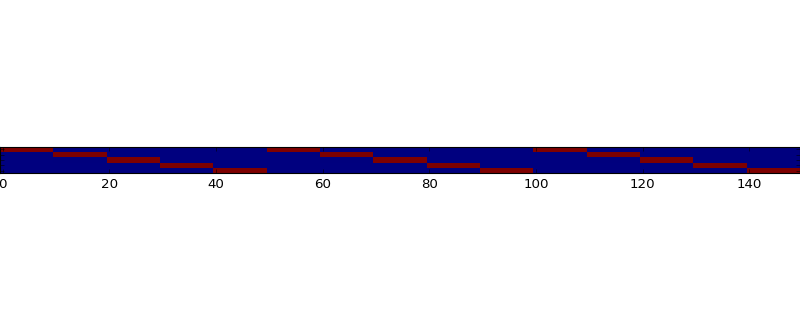

In [25]:
plot_cv(StratifiedKFold(y, n_folds=5), len(y))

<IPython.core.display.Javascript object>


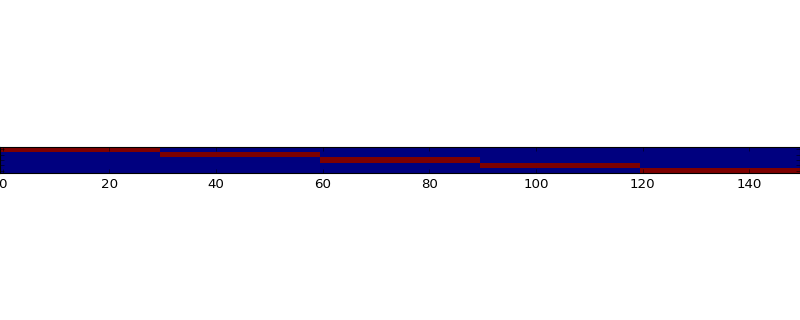

In [27]:
plot_cv(KFold(len(iris.target), n_folds=5), len(iris.target))

<IPython.core.display.Javascript object>


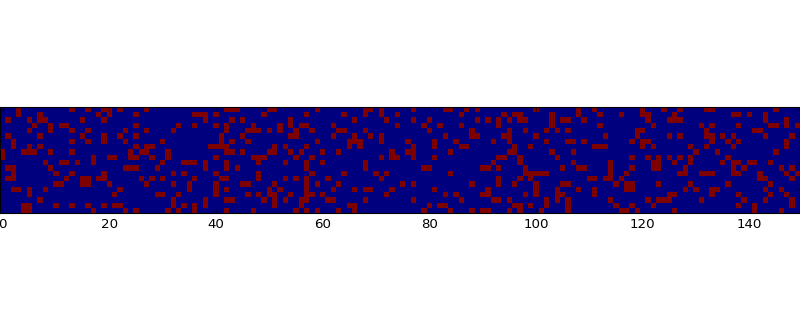

In [28]:
plot_cv(ShuffleSplit(len(iris.target), n_iter=20, test_size=.2), 
        len(iris.target))

# Exercises
Use  KFold cross validation and StratifiedKFold cross validation (3 or 5 folds) for LinearSVC on the iris dataset.
Why are the results so different? How could you get more similar results?

In [29]:
# %load solutions/cross_validation_iris.py
stratified_k_fold = StratifiedKFold(y, n_folds=5)
cross_val_score(LinearSVC(), X, y, cv=stratified_k_fold)

array([ 1.        ,  1.        ,  0.93333333,  0.9       ,  1.        ])

In [36]:
k_fold = KFold(len(y), n_folds=5)
cross_val_score(LinearSVC(), X, y, cv=k_fold)

array([ 1.        ,  1.        ,  0.66666667,  0.96666667,  0.66666667])

In [37]:
stratified_k_fold = StratifiedKFold(y, n_folds=5, shuffle=True)
cross_val_score(LinearSVC(), X, y, cv=stratified_k_fold)

array([ 0.9       ,  0.9       ,  1.        ,  1.        ,  0.96666667])

In [38]:
stratified_k_fold = StratifiedKFold(y, n_folds=3)
cross_val_score(LinearSVC(), X, y, cv=stratified_k_fold)

array([ 1.        ,  0.92156863,  0.97916667])

In [41]:
k_fold = KFold(len(y), n_folds=3)
cross_val_score(LinearSVC(), X, y, cv=k_fold)

array([ 0.,  0.,  0.])

In [42]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])